In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bendit

In [2]:
class Bandit:
    def __init__(self, m, mean=0):
        """
        m: true mean
        """
        self.m = m         # True mean
        self.mean = mean   # calculated mean
        self.N = 0         # total count
    
    def pull(self):        # simulate the pull scenadio of the bendit
        return np.random.randn() + self.m    # return a random number closer to original mean
    
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N) * self.mean + 1.0/self.N * x

# Define UCB function

In [3]:
def ucb(mean, n, nj):
    if nj == 0:
        return float('inf')
    return mean + np.sqrt(2 * np.log(n) / nj)

In [4]:
def run_experiment(m1, m2, m3, eps, N):
    """
    N : total number of trials
    m1, m2, m3 : True mean of 3 bandits
    """
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([ucb(b.mean, i+1, b.N) for b in bandits])
        
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # store the data for future plotting
        data[i] = x
    
    # find the cumulative average
    cumulative_agerage = np.cumsum(data) / (np.arange(N) + 1)
    
    # Plot moving average
    plt.plot(cumulative_agerage)
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print(b.mean)
    return cumulative_agerage

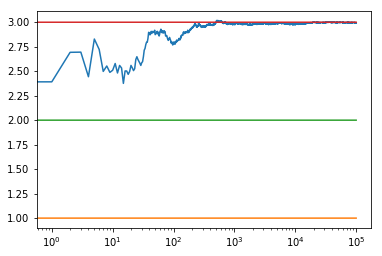

1.0122997837550844
1.967302895693386
2.9952380271986745


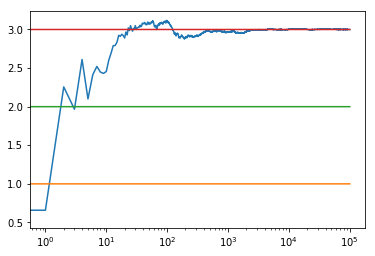

1.4342760702833943
2.001429823995802
2.9993821564281267


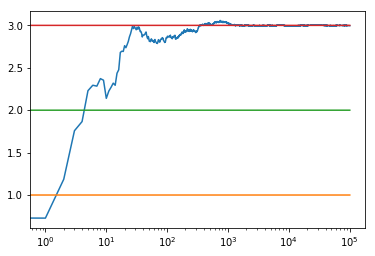

0.8081133807363784
0.49478567435033116
2.9962195056038423
(100000,)


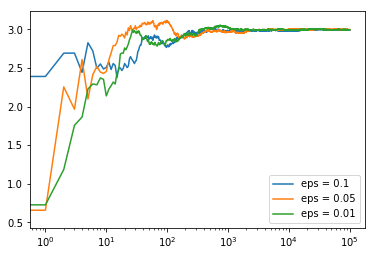

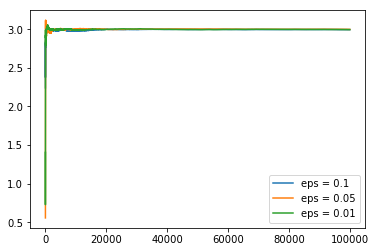

In [5]:
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

print(c_1.shape)

# log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.xscale('log')
plt.legend()
plt.show()

plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.show()